In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, roc_auc_score,f1_score
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

pd.set_option("display.max_columns", 250)
pd.set_option("display.max_rows", 250)

C:\Users\gayat\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Read the cleaned data
churn_filtered=pd.read_csv('telecom_cleaned_data.csv',index_col='mobile_number')
churn_filtered.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,days_from_LastRecharge_6,days_from_LastRecharge_7,days_from_LastRecharge_8,days_from_LastRecharge_data_6,days_from_LastRecharge_data_7,days_from_LastRecharge_data_8,churn,diff_loc_ic_t2t_mou,diff_loc_ic_t2m_mou,diff_loc_ic_t2f_mou,diff_loc_ic_mou,diff_std_ic_t2t_mou,diff_std_ic_t2m_mou,diff_std_ic_t2f_mou,diff_std_ic_mou,diff_spl_ic_mou,diff_isd_ic_mou,diff_ic_others,diff_roam_ic_mou,diff_total_ic_mou,diff_loc_og_t2t_mou,diff_loc_og_t2m_mou,diff_loc_og_t2f_mou,diff_loc_og_t2c_mou,diff_loc_og_mou,diff_std_og_t2t_mou,diff_std_og_t2m_mou,diff_std_og_t2f_mou,diff_std_og_mou,diff_spl_og_mou,diff_isd_og_mou,diff_og_others,diff_roam_og_mou,diff_total_og_mou,diff_onnet_mou,diff_offnet_mou,diff_vol_2g_mb,diff_vol_3g_mb,diff_monthly_2g,diff_monthly_3g,diff_sachet_2g,diff_sachet_3g,diff_total_rech_num,diff_max_rech_amt,diff_total_rech_amt,diff_arpu,diff_vbc_3g
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,110.885105,114.889268,75.130032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.0,-0.0,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.00000,0.000000,0.000000,-0.000000,-0.0,-0.000000,-0.000000,-0.000000,-0.0,-0.000000,-0.0,-0.0,-0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.149088,0.000000,0.000000,1.955600,-0.000000,-0.000000,0.673054,0.000000,0.000000,2.351212,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.00000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,2.427664,-0

In [3]:
churn_filtered.shape

(30001, 198)

In [4]:
X=churn_filtered.drop('churn', axis =1)
y=churn_filtered.churn
y.value_counts()

0    27560
1     2441
Name: churn, dtype: int64

### Splitting data into train and test data

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 10)
print("X_train Shape : ", X_train.shape)
print("X_test Shape : ", X_test.shape)

X_train Shape :  (21000, 197)
X_test Shape :  (9001, 197)


In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
def model_metrics(actual, pred):
    accuracy = round(accuracy_score(actual, pred),2)
    print('Accuracy  : ',accuracy)
    roc_score = round(roc_auc_score(actual, pred),2)
    print('ROC AUC   : ',roc_score)
    F1_score = round(f1_score(actual, pred),2)
    print('F1 score  : ',F1_score)
    print()
    print(classification_report(actual,pred))

    return accuracy, roc_score, F1_score

model_score=[]

## PCA for Dimensionality reduction

In [8]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA()

#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [9]:
# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       14.99
1       24.89
2       30.27
3       34.69
4       38.89
5       41.42
6       43.47
7       45.28
8       46.94
9       48.55
10      50.10
11      51.61
12      52.92
13      54.17
14      55.40
15      56.58
16      57.70
17      58.76
18      59.80
19      60.82
20      61.78
21      62.74
22      63.65
23      64.54
24      65.42
25      66.29
26      67.11
27      67.91
28      68.69
29      69.45
30      70.14
31      70.83
32      71.51
33      72.13
34      72.76
35      73.37
36      73.96
37      74.54
38      75.12
39      75.68
40      76.22
41      76.75
42      77.27
43      77.77
44      78.27
45      78.77
46      79.26
47      79.74
48      80.22
49      80.69
50      81.15
51      81.60
52      82.05
53      82.49
54      82.93
55      83.36
56      83.78
57      84.20
58      84.60
59      84.99
60      85.37
61      85.74
62      86.11
63      86.46
64      86.82
65      87.15
66      87.47
67      87.79
68      88.10
69      88.41
70      88.71
71    

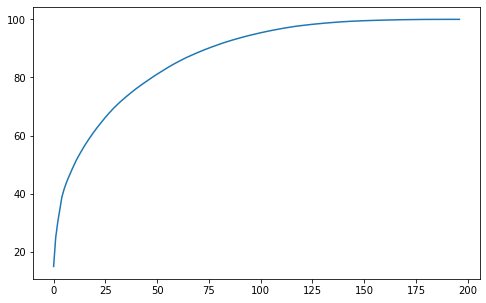

In [10]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(8,5)) 
plt.plot(cumulative_variance)

In [11]:
#Using PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca_final = PCA(n_components=70)

In [12]:
X_train_pca = pca_final.fit_transform(X_train)
X_test_pca = pca_final.transform(X_test)
print(X_train_pca.shape,X_test_pca.shape)

(21000, 70) (9001, 70)


### Handling class imbalance with SMOTE

In [13]:
# Balancing DataSet
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_train_smp,y_train_smp = sm.fit_sample(X_train_pca,y_train)

Using TensorFlow backend.


### Logistic Regression

In [131]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
from imblearn.metrics import sensitivity_specificity_support
log_reg_pca = LogisticRegression()
log_reg_pca.fit(X_train_smp, y_train_smp)

# Predicting the Test set results
y_pred_lr_pca = log_reg_pca.predict(X_test_pca)
#Testing accuracy for training data
print('Accuracy(Training): ',round(log_reg_pca.score(X_train_smp, y_train_smp),2))
print()
# Model metrics
acc_score, roc_score, F1_score = model_metrics(y_test, y_pred_lr_pca)
#Adding metrics to list
model_score.append({'Model Name':'Logistic Regression', 'Accuracy':acc_score, 'ROC-AUC':roc_score, 'F1 score':F1_score})

Accuracy(Training):  0.87

Accuracy  :  0.87
ROC AUC   :  0.86
F1 score  :  0.5

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      8321
           1       0.36      0.85      0.50       680

    accuracy                           0.87      9001
   macro avg       0.67      0.86      0.72      9001
weighted avg       0.94      0.87      0.90      9001



### Support Vector Machine

In [54]:
# pca+smote
from sklearn.svm import SVC
svc = SVC(kernel='rbf',C=0.1)
# fit the pca training data
svc.fit(X_train_smp, y_train_smp)
# predict on testing data
y_pred_svc = svc.predict(X_test_pca)
print('Accuracy(Training): ',round(svc.score(X_train_smp, y_train_smp),2))
print()
# Model metrics
acc_score, roc_score, F1_score = model_metrics(y_test, y_pred_svc)
#Adding metrics to list
model_score.append({'Model Name':'Support Vector Machine', 'Accuracy':acc_score, 'ROC-AUC':roc_score, 'F1 score':F1_score})

Accuracy(Training):  0.91

Accuracy  :  0.9
ROC AUC   :  0.85
F1 score  :  0.55

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      8321
           1       0.42      0.79      0.55       680

    accuracy                           0.90      9001
   macro avg       0.70      0.85      0.75      9001
weighted avg       0.94      0.90      0.91      9001



### Random Forest

In [59]:
# Fitting Random Forest Classification to the Training set on top features
from sklearn.ensemble import RandomForestClassifier
rfp_model = RandomForestClassifier(n_estimators= 200,min_samples_leaf= 3,max_features=4,max_depth= 9,criterion='entropy',bootstrap=True)
rfp_model.fit(X_train_smp, y_train_smp)

# Predicting the Test set results
y_pred_rfp = rfp_model.predict(X_test_pca)
print('Accuracy(Training): ',round(rfp_model.score(X_train_smp, y_train_smp),2))
print()
# Model metrics
acc_score, roc_score, F1_score = model_metrics(y_test, y_pred_rfp)
#Adding metrics to list
model_score.append({'Model Name':'Random Forest', 'Accuracy':acc_score, 'ROC-AUC':roc_score, 'F1 score':F1_score})

Accuracy(Training):  0.92

Accuracy  :  0.92
ROC AUC   :  0.82
F1 score  :  0.56

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      8321
           1       0.46      0.70      0.56       680

    accuracy                           0.92      9001
   macro avg       0.72      0.82      0.76      9001
weighted avg       0.94      0.92      0.92      9001



### Random Forest - RandomizedSearchCV

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import fbeta_score, make_scorer
f1_scorer = make_scorer(fbeta_score, beta=1)
parameters = {'max_depth':[3,4,5,6,None],
              'n_estimators':[200,300,400,500],
              'max_features':[6,7,8,9,10],
               'criterion':['gini','entropy'],
               'min_samples_leaf':[2,3,4,5]
              }
rf_model_rsp=RandomForestClassifier()

random_search_rf = RandomizedSearchCV(estimator = rf_model_rsp,param_distributions = parameters,scoring = f1_scorer,cv = 3,n_jobs = -1)
random_search_rf.fit(X_train_smp, y_train_smp)
gs_accuracy = random_search_rf.best_score_
best_param=random_search_rf.best_params_

best_param

{'n_estimators': 400,
 'min_samples_leaf': 3,
 'max_features': 8,
 'max_depth': None,
 'criterion': 'entropy'}

In [26]:
# Predicting the Test set results
y_pred_rfr = random_search_rf.predict(X_test_pca)

acc_score, roc_score, F1_score = model_metrics(y_test, y_pred_rfr)
#Adding metrics to list
model_score.append({'Model Name':'Random Forest-RandomizedSearchCV', 'Accuracy':acc_score, 'ROC-AUC':roc_score, 'F1 score':F1_score})

Accuracy  :  0.93
ROC AUC   :  0.8
F1 score  :  0.59

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      8321
           1       0.55      0.64      0.59       680

    accuracy                           0.93      9001
   macro avg       0.76      0.80      0.78      9001
weighted avg       0.94      0.93      0.93      9001



## Finding top features

In [113]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import fbeta_score, make_scorer
f1_scorer = make_scorer(fbeta_score, beta=1)
parameters = {'max_depth':[3,5,10,None],
              'n_estimators':[100,200,300,400,500],
              'max_features':[4,5,6,7,8,9],
               'criterion':['gini','entropy'],
               'min_samples_leaf':[3,4,5],
              }
rf_model_rs=RandomForestClassifier()

random_search_rf = RandomizedSearchCV(estimator = rf_model_rs,param_distributions = parameters,scoring = f1_scorer,cv = 3,verbose=10,n_jobs = -1)
random_search_rf.fit(X_train, y_train)
gs_accuracy = random_search_rf.best_score_
best_param=random_search_rf.best_params_

best_param

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done  11 out of  30 | elapsed:   22.1s remaining:   38.3s
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:   25.7s remaining:   25.7s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:   32.8s remaining:   19.0s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   44.7s remaining:   13.5s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   45.7s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   51.2s finished


{'n_estimators': 200,
 'min_samples_leaf': 4,
 'max_features': 8,
 'max_depth': 10,
 'criterion': 'entropy'}

In [121]:
# Predicting the Test set results
model_rf = RandomForestClassifier(n_estimators= 200,min_samples_leaf= 4,max_features=8,max_depth= 10,criterion='entropy')
model_rf.fit(X_train,y_train)
y_pred_rfs = model_rf.predict(X_test)

acc_score, roc_score, F1_score = model_metrics(y_test, y_pred_rfs)

Accuracy  :  0.95
ROC AUC   :  0.73
F1 score  :  0.57

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      8321
           1       0.73      0.47      0.57       680

    accuracy                           0.95      9001
   macro avg       0.84      0.73      0.77      9001
weighted avg       0.94      0.95      0.94      9001



In [122]:
# predictors
features = churn_filtered.drop('churn', axis=1).columns

# feature_importance
importance = model_rf.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.00000000000001


,variables,importance_percentage
0,total_ic_mou_8,4.771044
1,loc_ic_mou_8,4.164290
2,loc_og_t2m_mou_8,3.472618
3,loc_ic_t2m_mou_8,3.306736
4,total_rech_amt_8,2.878845
5,total_og_mou_8,2.771822
6,max_rech_amt_8,2.735769
7,loc_ic_t2t_mou_8,2.702714
8,loc_og_mou_8,2.522074
9,last_day_rch_amt_8,2.396799


In [126]:
# extract top features
top_features = feature_importance.variables[0:15]
print(top_features[:15])

0               total_ic_mou_8
1                 loc_ic_mou_8
2             loc_og_t2m_mou_8
3             loc_ic_t2m_mou_8
4             total_rech_amt_8
5               total_og_mou_8
6               max_rech_amt_8
7             loc_ic_t2t_mou_8
8                 loc_og_mou_8
9           last_day_rch_amt_8
10         diff_total_rech_amt
11                      arpu_8
12                   diff_arpu
13    days_from_LastRecharge_8
14               roam_ic_mou_8
Name: variables, dtype: object


### Comparison of models

In [149]:
# Comparison of models
model_score_df = pd.DataFrame(model_score,columns=['Model Name', 'Accuracy', 'ROC-AUC','F1 score'])

# Sorting as per F1 score
model_score_df.sort_values(['F1 score'], ascending=False)

,Model Name,Accuracy,ROC-AUC,F1 score
3,Random Forest-RandomizedSearchCV,0.93,0.80,0.59
2,Random Forest,0.92,0.82,0.56
1,Support Vector Machine,0.90,0.85,0.55
0,Logistic Regression,0.87,0.86,0.50


## Conclusion
- As 8.14% of the customers are churning, we can say that the company is performing well in the market.
- The minutes of usage seem to be the most important factors resulting in churn. The telecom company can introduce some attractive offers for outgoing calls, especially for t2m i.e. calls to other operators and on incoming roaming calls. 
- The usage of the action phase seems to play the most important role and are strong indicators of churn behaviour.
- The difference in recharge amount for action phase and good phase and the maximum recharge amount for action phase are strong indicators of churn behaviour.
- The average revenue per user and difference between arpu of action phase and good phase is also a strong indicator of churn behaviour.
- Random Forest is the best model as it has the highest F1 score of 0.59.